In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
filename = '....../ucl-sanger_covid_airway.submit_to_czi.cellxgene.20200911.h5ad'
ann = sc.read(filename, backed=None, sheet=None, ext=None, delimiter=None, first_column_names=False, backup_url=None, cache=False)

Only considering the two last: ['.20200911', '.h5ad'].
Only considering the two last: ['.20200911', '.h5ad'].


In [6]:
ann.obs

SampleID    Age  ...   Institute ObjectCreateDate
index                                             ...                             
AAACCTGAGATGCGAC-CV001_KM8853698   AP1-NB  50-60  ...  UCL-SANGER         20200804
AAACCTGCAACACGCC-CV001_KM8853698   AP1-NB  50-60  ...  UCL-SANGER         20200804
AAACCTGCACACGCTG-CV001_KM8853698   AP1-NB  50-60  ...  UCL-SANGER         20200804
AAACCTGTCCTACAGA-CV001_KM8853698   AP1-NB  50-60  ...  UCL-SANGER         20200804
AAACGGGAGTGAAGTT-CV001_KM8853698   AP1-NB  50-60  ...  UCL-SANGER         20200804
...                                   ...    ...  ...         ...              ...
TTTGTCACAGACAAGC-CV001_KM8854513   AP5-NB  50-60  ...  UCL-SANGER         20200804
TTTGTCATCAGATAAG-CV001_KM8854513   AP5-NB  50-60  ...  UCL-SANGER         20200804
TTTGTCATCAGCTCTC-CV001_KM8854513   AP5-NB  50-60  ...  UCL-SANGER         20200804
TTTGTCATCCCATTTA-CV001_KM8854513   AP5-NB  50-60  ...  UCL-SANGER         20200804
TTTGTCATCGGTGTCG-CV001_KM8854513   AP5-NB  50-60  ...  UCL-SANGER         20200804

[10550 rows x 30 columns]

In [7]:
ann.obs.RespiratorySupport.unique()

['Non-invasive ventilation (CPAP, BiPAP, HFNC)', 'None']
Categories (2, object): ['Non-invasive ventilation (CPAP, BiPAP, HFNC)', 'None']

In [8]:
#Covid dataset
covid = ann[ann.obs["SARSCoV2PCR"] == "Positve", :]
nocovid = ann[ann.obs["SARSCoV2PCR"] == "Negative", :]




In [9]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.4.1 pandas==1.1.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.9.1 leidenalg==0.8.3


In [10]:
ann.obs.Annotation.unique()

['Secretory 1', 'Secretory 2', 'Basal cycling', 'Basal', 'Ciliated 2', ..., 'DCs', 'Mast', 'Monocytes', 'Macrophages', 'B']
Length: 18
Categories (18, object): ['Secretory 1', 'Secretory 2', 'Basal cycling', 'Basal', ..., 'Mast',
                          'Monocytes', 'Macrophages', 'B']

normalizing counts per cell
    finished (0:00:00)


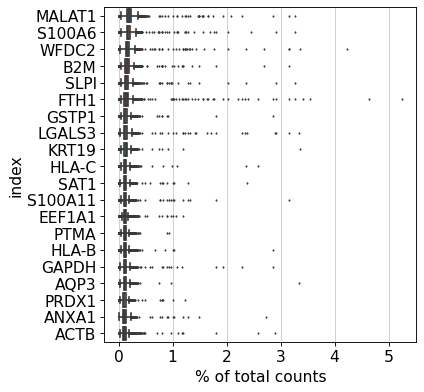

In [11]:
sc.pl.highest_expr_genes(ann, n_top=20, )

In [12]:
sc.pp.filter_cells(ann, min_genes=200)
sc.pp.filter_genes(ann, min_cells=3)

filtered out 51 cells that have less than 200 genes expressed
filtered out 12452 genes that are detected in less than 3 cells


In [13]:
ann.var['mt'] = ann.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(ann, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

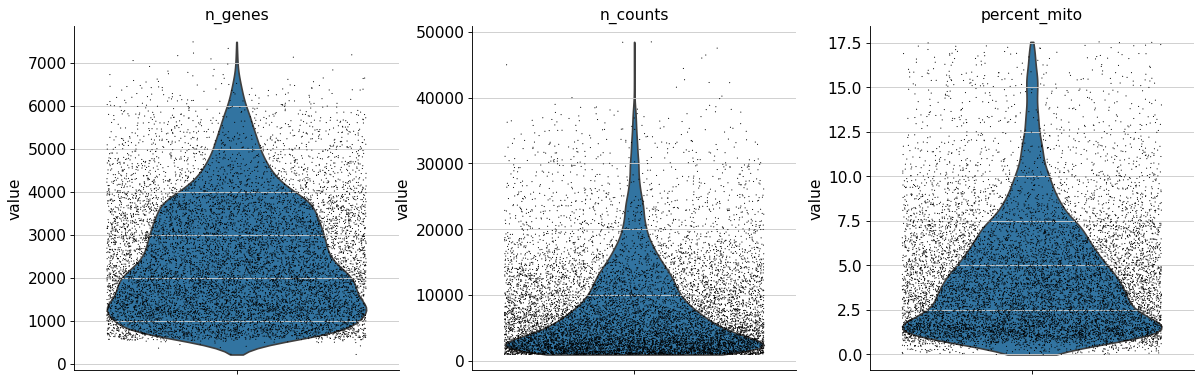

In [14]:
sc.pl.violin(ann, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

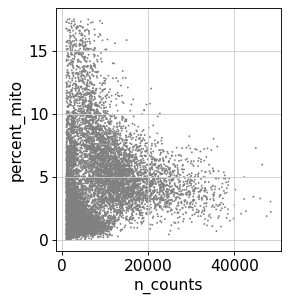

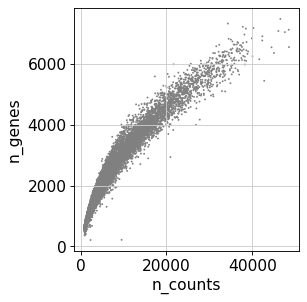

In [15]:
sc.pl.scatter(ann, x='n_counts', y='percent_mito')
sc.pl.scatter(ann, x='n_counts', y='n_genes')

In [16]:
ann = ann[ann.obs.n_genes < 2500, :]
ann = ann[ann.obs.percent_mito < 5, :]

In [17]:
sc.pp.normalize_total(ann, target_sum=1e4)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [19]:
sc.pp.log1p(ann)

In [20]:
sc.pp.highly_variable_genes(ann, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


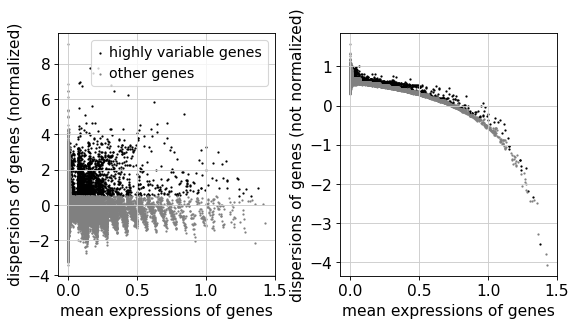

In [21]:
sc.pl.highly_variable_genes(ann)

In [22]:
ann.raw = ann

In [23]:
ann = ann[:, ann.var.highly_variable]

In [24]:
sc.pp.regress_out(ann, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
    finished (0:00:16)


In [25]:
sc.pp.scale(ann, max_value=10)

In [26]:
sc.tl.pca(ann, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


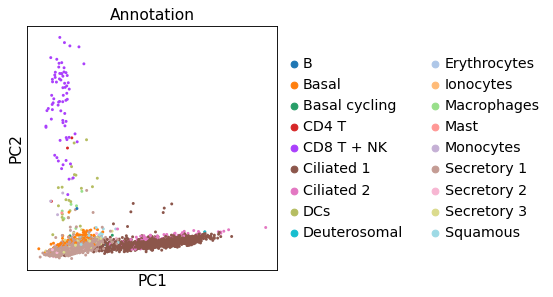

In [27]:
sc.pl.pca(ann, color='Annotation')

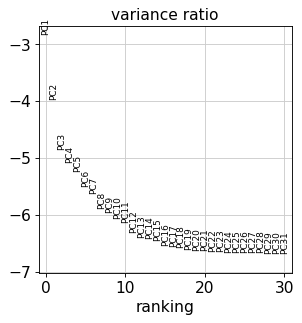

In [28]:
sc.pl.pca_variance_ratio(ann, log=True)

In [29]:
ann

AnnData object with n_obs × n_vars = 4265 × 2344
    obs: 'SampleID', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'HeartDisease', 'LungDisease', 'KidneyDisease', 'Diabetes', 'Hypertension', 'Immunocompromised', 'Smoking', 'SARSCoV2PCR', 'SARSCoV2Ab', 'Symptomatic', 'AdmittedToHospital', 'RespiratorySupport', 'RequiredVasoactive', 'Death28', 'TypeOfSample', 'n_counts', 'n_genes', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'Annotation', 'Institute', 'ObjectCreateDate', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Annotation_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'

In [30]:
sc.pp.neighbors(ann) 
# , n_neighbors=10, n_pcs=40

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [31]:
sc.tl.umap(ann,)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


Clustering the neighborhood graph

In [32]:
sc.tl.leiden(ann)

running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


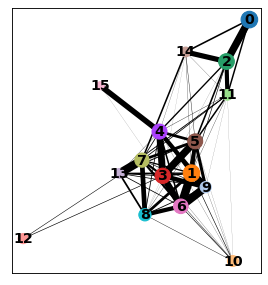

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


In [33]:
sc.tl.paga(ann)
sc.pl.paga(ann, )  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(ann, init_pos='paga' )

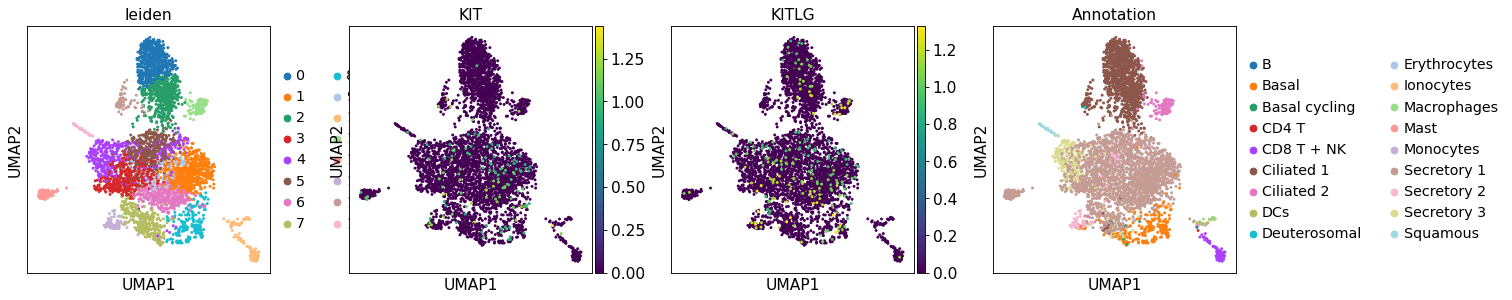

In [34]:
sc.pl.umap(ann, color=['leiden', 'KIT', 'KITLG', 'Annotation'])

**Finding marker genes**
ranking for the highly differential genes in each cluster

In [35]:
sc.settings.verbosity = 2  # reduce the verbosity

In [36]:
#Exclude from dataset Annotations with unique values
pvls = ann[~ann.obs['Annotation'].isin(['B','Mast']) ]

In [37]:
pvls.obs['Annotation'].unique()

['Secretory 1', 'Basal cycling', 'Ciliated 2', 'Secretory 2', 'Basal', ..., 'Ionocytes', 'DCs', 'Deuterosomal', 'Monocytes', 'Macrophages']
Length: 16
Categories (16, object): ['Secretory 1', 'Basal cycling', 'Ciliated 2', 'Secretory 2', ..., 'DCs',
                          'Deuterosomal', 'Monocytes', 'Macrophages']

ranking genes
Trying to set attribute `.uns` of view, copying.
    finished (0:00:06)


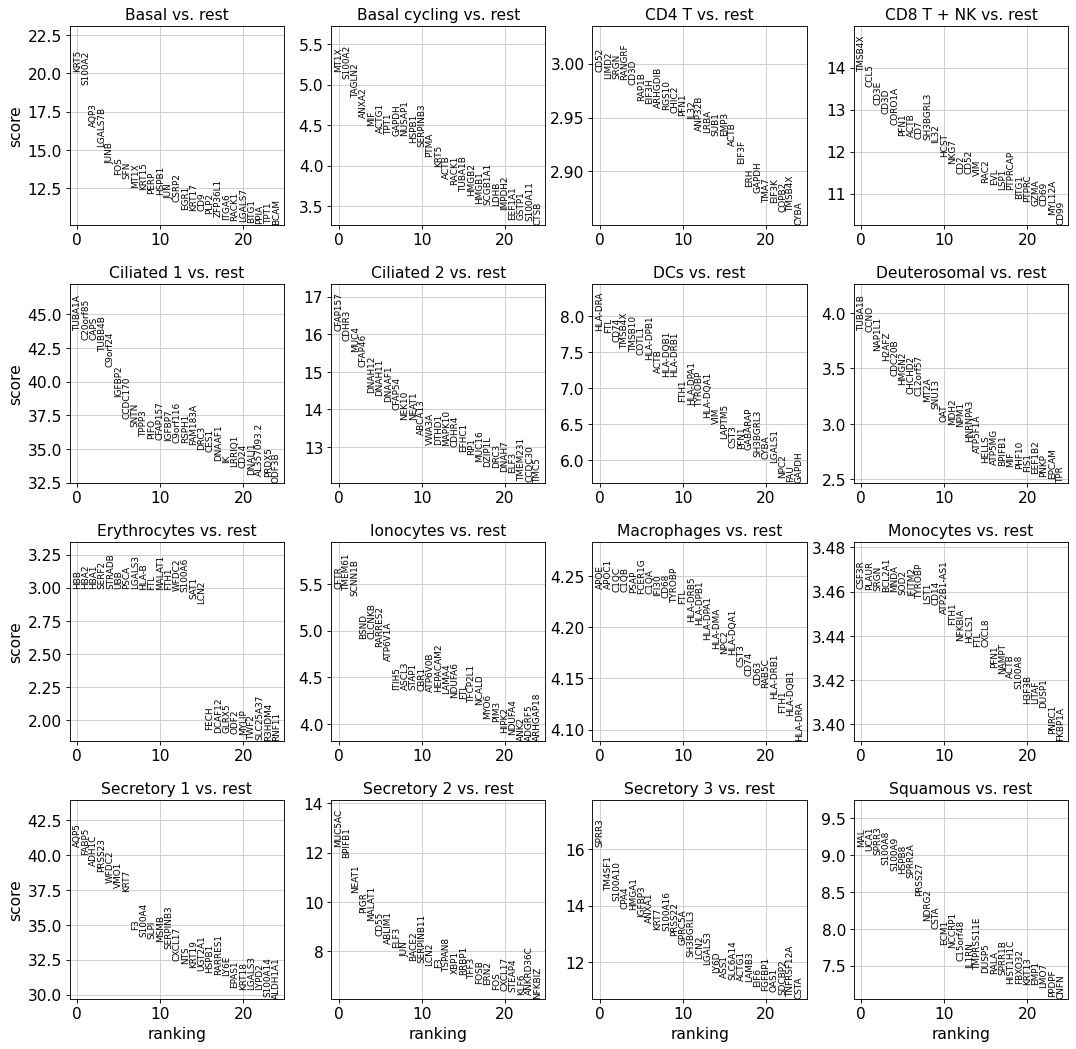

In [38]:
#Wilcoxon rank-sum (Mann-Whitney-U) test

sc.tl.rank_genes_groups(pvls, 'Annotation', method='wilcoxon')
sc.pl.rank_genes_groups(pvls, n_genes=25, sharey=False)

In [39]:
result = pvls.uns['rank_genes_groups']
groups = result['names'].dtype.names
expr = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

In [41]:
names  =[]
pvals = []
pvals_adj = []
logFC = []

for i in range(len(result['names'])):
  for name in result['names'][i]:
      names.append(name)
  for pval in result['pvals'][i]:
      pvals.append(pval)
  for pval_adj in result['pvals_adj'][i]:
      pvals_adj.append(pval_adj)
  for fc in result['logfoldchanges'][i]:
      logFC.append(fc)

wilcoxon = pd.DataFrame(
    {'genes': names,
     'pvals': pvals,
     'pvals_adj': pvals_adj,
     'logFC': logFC
    })


In [42]:
#Simple check for statistical inference in genes we interested in
wilcoxon[wilcoxon['genes'].isin(['KIT', 'KITLG'] )]

genes     pvals  pvals_adj      logFC
2025      KIT  0.009583   1.000000   4.556742
13437   KITLG  0.259149   1.000000   1.440893
31040   KITLG  0.322866   1.000000   1.020945
31173   KITLG  0.498097   1.000000   1.064254
38368     KIT  0.434375   1.000000   1.042778
52365     KIT  0.788793   1.000000   0.686120
54988     KIT  0.229951   0.815603   1.152701
65471   KITLG  0.816293   1.000000   0.597979
71212   KITLG  0.499393   1.000000   0.326865
83599     KIT  0.953993   1.000000   0.167531
189848    KIT  0.931006   1.000000 -24.855787
202859    KIT  0.920357   1.000000 -24.856131
204210    KIT  0.931006   1.000000 -24.855787
211370    KIT  0.902515   1.000000 -24.856819
215304  KITLG  0.892495   1.000000 -25.540928
222179    KIT  0.827719   1.000000  -0.914620
227185    KIT  0.874298   1.000000 -24.858194
227259  KITLG  0.875975   1.000000 -25.541273
228914  KITLG  0.892495   1.000000 -25.540928
232294    KIT  0.818440   1.000000 -24.861988
235354  KITLG  0.848373   1.000000 -25.541967
237703    KIT  0.902515   1.000000 -24.856819
242261    KIT  0.709269   1.000000  -1.568000
251425  KITLG  0.804948   1.000000 -25.543356
256035  KITLG  0.646641   1.000000  -1.664531
256726  KITLG  0.720100   1.000000 -25.547182
260743  KITLG  0.848373   1.000000 -25.541967
267438  KITLG  0.784445   1.000000  -0.498774
272329  KITLG  0.804948   1.000000 -25.543356
277150    KIT  0.722520   1.000000  -1.077452
285908  KITLG  0.127162   0.467553  -1.237770
288628    KIT  0.094551   0.366995  -2.935153

ranking genes
    finished (0:00:01)


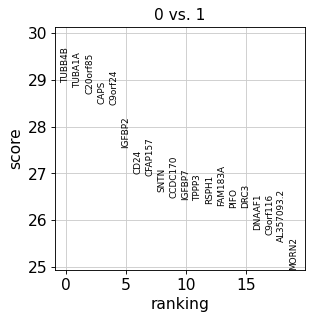

In [43]:
#Compare to a single cluster

sc.tl.rank_genes_groups(ann, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(ann, groups=['0'], n_genes=20)

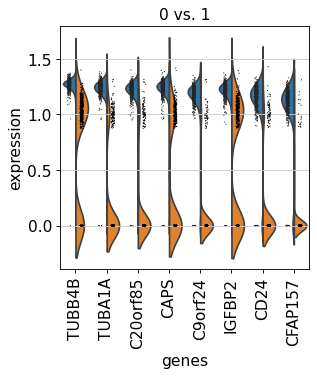

In [44]:
sc.pl.rank_genes_groups_violin(ann, groups='0', n_genes=8)

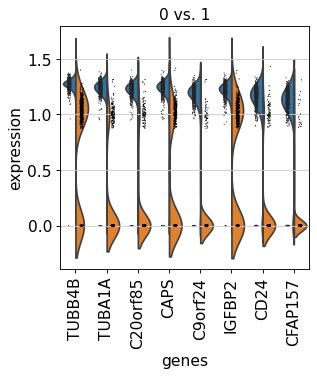

In [45]:
sc.pl.rank_genes_groups_violin(ann, groups='0', n_genes=8)

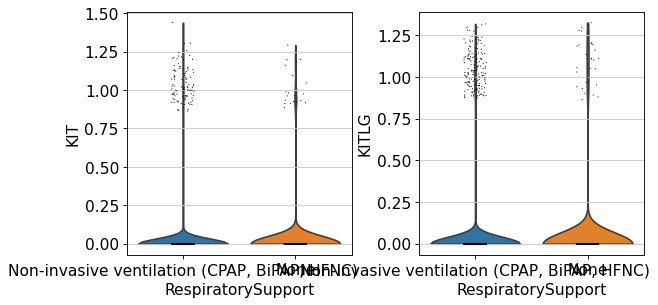

In [46]:
sc.pl.violin(ann, ['KIT', 'KITLG'], groupby='RespiratorySupport')

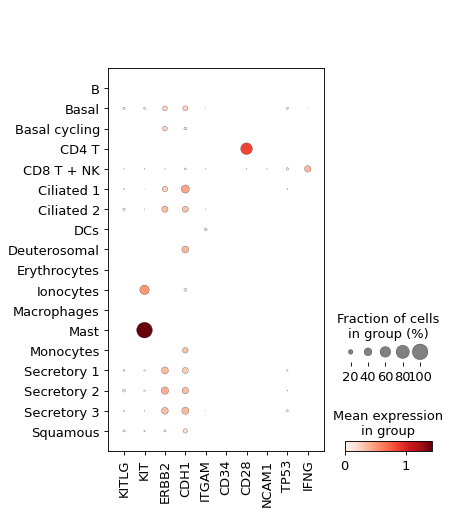

In [48]:
marker_genes = ['KITLG', 'KIT', 'ERBB2', 'CDH1', 'ITGAM',  'CD34', 'CD28', 'NCAM1', 'TP53','IFNG']
sc.pl.dotplot(ann, marker_genes, groupby='Annotation', save='Airwaycovid.svg')

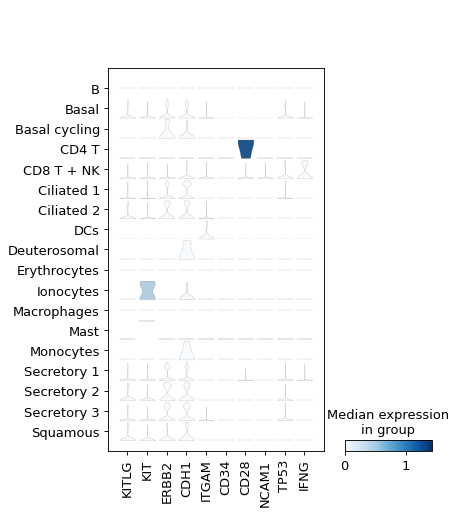

In [49]:
sc.pl.stacked_violin(ann, marker_genes, groupby='Annotation', rotation=90, save='Airwaycovid.svg')